In [1]:
# Importando o Pandas
import pandas as pd

In [2]:
# Carregando o DataFrame com os dados da base
df_ibovespa = pd.read_csv('Assets/Base/ibovespa.csv', sep=',')

In [3]:
# Verificando o DataFrame
df_ibovespa.head(10)

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,11.03.2021,114.984,112.782,115.127,112.776,"12,09M","1,96%"
1,10.03.2021,112.776,111.331,112.928,109.999,"12,51M","1,30%"
2,09.03.2021,111.331,110.611,112.525,109.343,"12,14M","0,65%"
3,08.03.2021,110.612,115.202,115.202,110.268,"13,70M","-3,98%"
4,05.03.2021,115.202,112.690,115.504,112.504,"13,25M","2,23%"
5,04.03.2021,112.690,111.191,114.433,111.163,"14,22M","1,35%"
6,03.03.2021,111.184,111.529,112.398,107.466,"15,14M","-0,32%"
7,02.03.2021,111.540,110.328,112.428,107.319,"14,82M","1,09%"
8,01.03.2021,110.335,110.036,112.445,110.036,"11,24M","0,27%"
9,26.02.2021,110.035,112.260,113.466,109.827,"14,62M","-1,98%"


In [4]:
# Verificando valores nulos no DataFrame
df_ibovespa.isnull().sum()

Data        0
Último      0
Abertura    0
Máxima      0
Mínima      0
Vol.        1
Var%        0
dtype: int64

In [5]:
# Encontrando o dado nulo na linha correspondente
df_ibovespa[df_ibovespa['Vol.'].isna()]

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
1258,10.02.2016,40.377,40.592,40.592,39.96,NaN,"-0,53%"


In [6]:
# Decidimos não alterar o valor NaN nessa ocasião, pois essa alteração não afetará de forma drástica a nossa previsão,
# pois utilizaremos apenas os dados de fechamento de mercado no estudo.
# Caso fosse nessesário poderiamos utilizar a linha de código abaixo para alterar o valor em questão
# df_ibovespa['Vol.'] = df_ibovespa['Vol.'].fillna(0)

In [7]:
# Verificando dados duplicados
df_ibovespa.duplicated().sum()

0

In [8]:
# Verificando o shape do DataFrame
df_ibovespa.shape

(4999, 7)

In [9]:
# Verificando informações do Dataframe
df_ibovespa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Data      4999 non-null   object 
 1   Último    4999 non-null   float64
 2   Abertura  4999 non-null   float64
 3   Máxima    4999 non-null   float64
 4   Mínima    4999 non-null   float64
 5   Vol.      4998 non-null   object 
 6   Var%      4999 non-null   object 
dtypes: float64(4), object(3)
memory usage: 273.5+ KB


In [10]:
# Convertendo coluna Data de object para datetime
df_ibovespa['Data'] = pd.to_datetime(df_ibovespa['Data'],format='%d.%m.%Y')
df_ibovespa.head(10)

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,2021-03-11,114.984,112.782,115.127,112.776,"12,09M","1,96%"
1,2021-03-10,112.776,111.331,112.928,109.999,"12,51M","1,30%"
2,2021-03-09,111.331,110.611,112.525,109.343,"12,14M","0,65%"
3,2021-03-08,110.612,115.202,115.202,110.268,"13,70M","-3,98%"
4,2021-03-05,115.202,112.690,115.504,112.504,"13,25M","2,23%"
5,2021-03-04,112.690,111.191,114.433,111.163,"14,22M","1,35%"
6,2021-03-03,111.184,111.529,112.398,107.466,"15,14M","-0,32%"
7,2021-03-02,111.540,110.328,112.428,107.319,"14,82M","1,09%"
8,2021-03-01,110.335,110.036,112.445,110.036,"11,24M","0,27%"
9,2021-02-26,110.035,112.260,113.466,109.827,"14,62M","-1,98%"


In [11]:
# Transformando as colunas que estão como float para int
df_ibovespa['Último'] = df_ibovespa['Último'] * 1000
df_ibovespa['Último'] = df_ibovespa['Último'].astype(int)
df_ibovespa['Abertura'] = df_ibovespa['Abertura'] * 1000
df_ibovespa['Abertura'] = df_ibovespa['Abertura'].astype(int)
df_ibovespa['Máxima'] = df_ibovespa['Máxima'] * 1000
df_ibovespa['Máxima'] = df_ibovespa['Máxima'].astype(int)
df_ibovespa['Mínima'] = df_ibovespa['Mínima'] * 1000
df_ibovespa['Mínima'] = df_ibovespa['Mínima'].astype(int)
df_ibovespa.head(10)

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,2021-03-11,114984,112782,115127,112776,"12,09M","1,96%"
1,2021-03-10,112776,111331,112928,109999,"12,51M","1,30%"
2,2021-03-09,111331,110611,112525,109343,"12,14M","0,65%"
3,2021-03-08,110612,115202,115202,110268,"13,70M","-3,98%"
4,2021-03-05,115202,112690,115504,112504,"13,25M","2,23%"
5,2021-03-04,112690,111191,114433,111163,"14,22M","1,35%"
6,2021-03-03,111184,111529,112398,107466,"15,14M","-0,32%"
7,2021-03-02,111540,110328,112428,107319,"14,82M","1,09%"
8,2021-03-01,110335,110036,112445,110036,"11,24M","0,27%"
9,2021-02-26,110035,112260,113466,109827,"14,62M","-1,98%"


In [12]:
# Importando a bibliotéca matplotlib
import matplotlib.pyplot as plt

In [13]:
# indexando o DataFrame pela data
df_ibovespa_indexData = df_ibovespa.set_index(['Data'])
df_ibovespa_indexData.head(10)

,Último,Abertura,Máxima,Mínima,Vol.,Var%
Data,,,,,,
2021-03-11,114984,112782,115127,112776,"12,09M","1,96%"
2021-03-10,112776,111331,112928,109999,"12,51M","1,30%"
2021-03-09,111331,110611,112525,109343,"12,14M","0,65%"
2021-03-08,110612,115202,115202,110268,"13,70M","-3,98%"
2021-03-05,115202,112690,115504,112504,"13,25M","2,23%"
2021-03-04,112690,111191,114433,111163,"14,22M","1,35%"
2021-03-03,111184,111529,112398,107466,"15,14M","-0,32%"
2021-03-02,111540,110328,112428,107319,"14,82M","1,09%"
2021-03-01,110335,110036,112445,110036,"11,24M","0,27%"


In [14]:
# Salvando o DataFrame
df_ibovespa_indexData.to_csv('Assets/DataFrames/ibov.csv', index=True)

### Visualizando o fechamento diário do Ibovespa no período entre 27-12-2000 a 11-03-2021

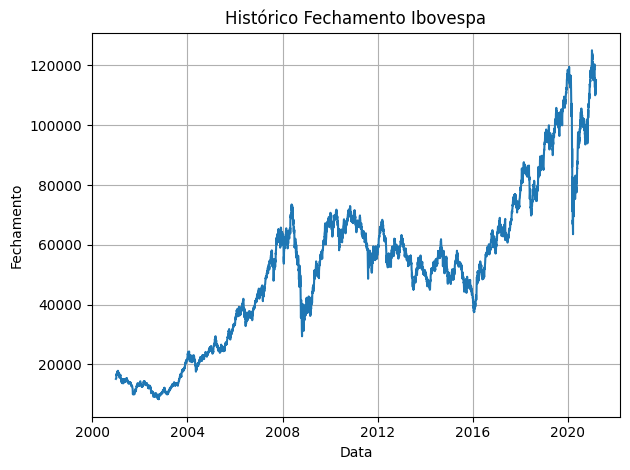

In [15]:
# Criando o gráfico do fechamento histórico do Ibovespa
plt.xlabel('Data')
plt.ylabel('Fechamento')
plt.title('Histórico Fechamento Ibovespa')
plt.plot(df_ibovespa_indexData['Último'])
plt.grid()
plt.tight_layout()
#plt.savefig('Assets/Graficos/historico.jpg')
plt.show()

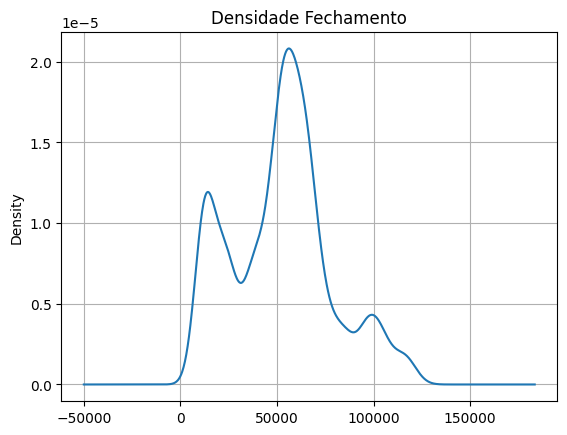

In [16]:
# Distribuição do dataset
df_fechamento = df_ibovespa_indexData['Último']
df_fechamento.plot(kind='kde')
plt.title('Densidade Fechamento')
plt.grid()
#plt.savefig('Assets/Graficos/densidade.jpg')
plt.show()

#### Podemos observar pelo gráfico da densidade que históricamente o fechamento do Ibovespa se concentrou na maior parte do tempo em torno dos 50.000 pontos

In [17]:
# importando o numpy
import numpy as np

In [18]:
# Transformação logarítmica da série temporal
df_ibovespa_indexData_log = np.log(df_ibovespa_indexData['Último'])

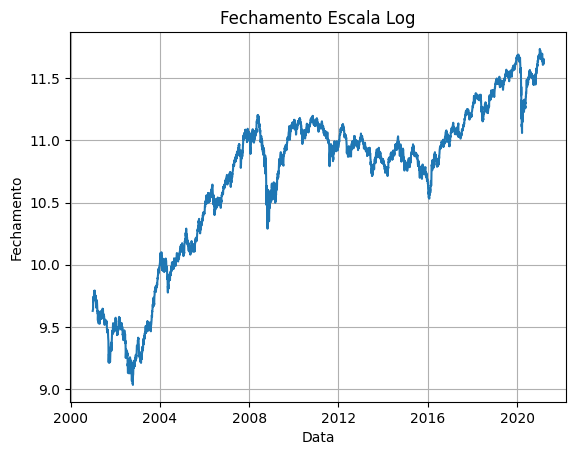

In [19]:
# Gráfico da série temporal logaritmica
plt.xlabel('Data')
plt.ylabel('Fechamento')
plt.title('Fechamento Escala Log')
plt.plot(df_ibovespa_indexData_log)
plt.grid()
#plt.savefig('Assets/Graficos/log.jpg')
plt.show()

In [20]:
# Calculando a média móvel
rolmean = df_ibovespa_indexData['Último'].rolling(12).mean()
rolmean_log = df_ibovespa_indexData_log.rolling(12).mean()

In [21]:
# Calculando o desvio padrão
rolstd = df_ibovespa_indexData['Último'].rolling(12).std()
rolstd_log = df_ibovespa_indexData_log.rolling(12).std()

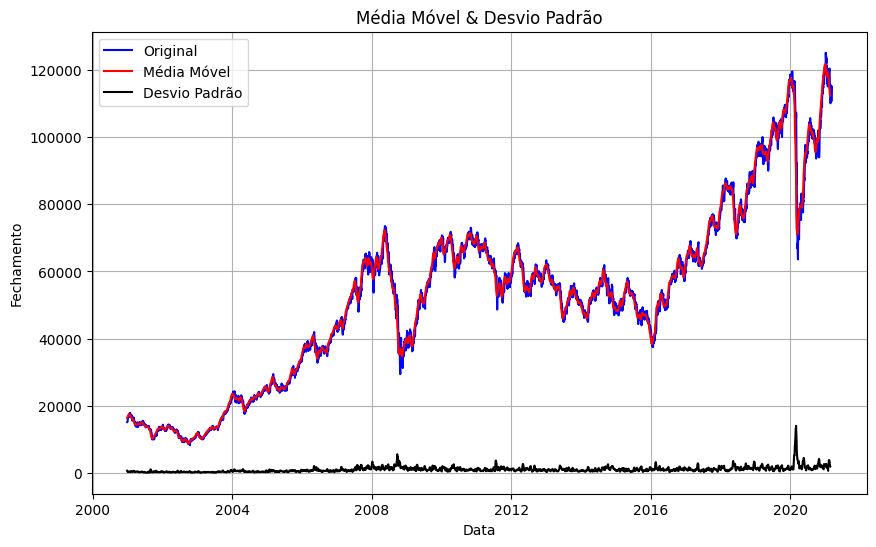

In [22]:
# Média Móvel & Desvio Padrão

plt.figure(figsize=(10,6))
plt.plot(df_ibovespa_indexData['Último'], color='blue', label='Original')
plt.plot(rolmean, color='red', label='Média Móvel')
plt.plot(rolstd, color='black', label='Desvio Padrão')
plt.legend(loc='upper left')
plt.xlabel('Data')
plt.ylabel('Fechamento')
plt.title('Média Móvel & Desvio Padrão')
plt.grid()
#plt.savefig('Assets/Graficos/mm_std.jpg')
plt.show()

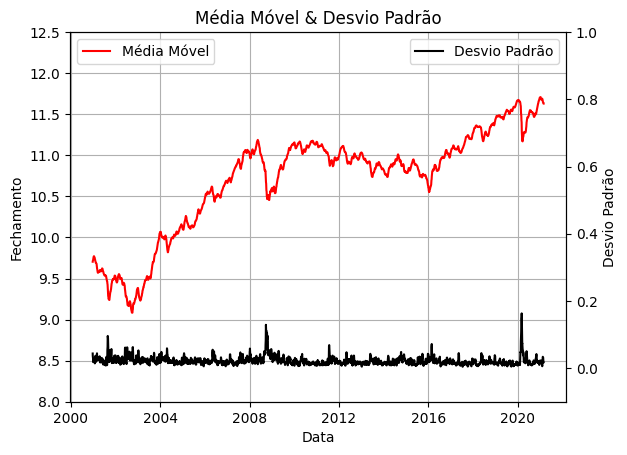

<Figure size 1000x600 with 0 Axes>

In [23]:
# Média Móvel & Desvio Padrão

fig, ax1 = plt.subplots()
plt.figure(figsize=(10,6))
ax1.plot(rolmean_log, color='red', label='Média Móvel')
ax2 = ax1.twinx()
ax2.plot(rolstd_log, color='black', label='Desvio Padrão')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.set_xlabel('Data')
ax1.set_ylabel('Fechamento')
ax1.set_title('Média Móvel & Desvio Padrão')
ax1.set_ylim(8,12.5)
ax2.set_ylabel('Desvio Padrão')
ax2.set_ylim(-0.1, 1)
ax1.grid()
#fig.savefig('Assets/Graficos/mm_std_log.jpg')
plt.show()

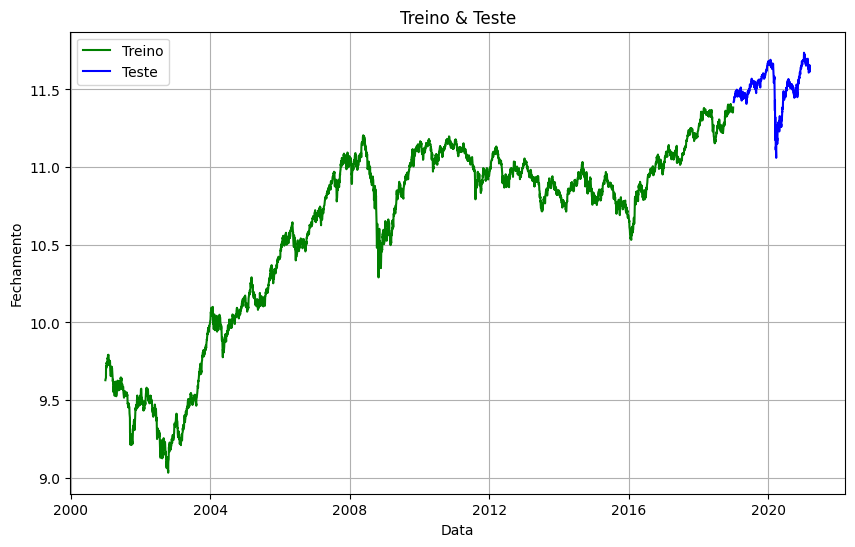

In [24]:
#Dividindo os dados em treino e teste
train_data, test_data = df_ibovespa_indexData_log.loc[df_ibovespa_indexData_log.index < '2019-01-01'], df_ibovespa_indexData_log.loc[df_ibovespa_indexData_log.index >= '2019-01-01']
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Data')
plt.ylabel('Fechamento')
plt.title('Treino & Teste')
plt.plot(train_data, 'green', label='Treino')
plt.plot(test_data, 'blue', label='Teste')
plt.legend()
#plt.savefig('Assets/Graficos/treino_teste.jpg')
plt.show()

In [25]:
# Importando o Seasonal Decompose
from statsmodels.tsa.seasonal import seasonal_decompose

In [26]:
# Decompondo a series de forma sazonal
resultados = seasonal_decompose(df_ibovespa_indexData_log, model='multiplicative', period=30)

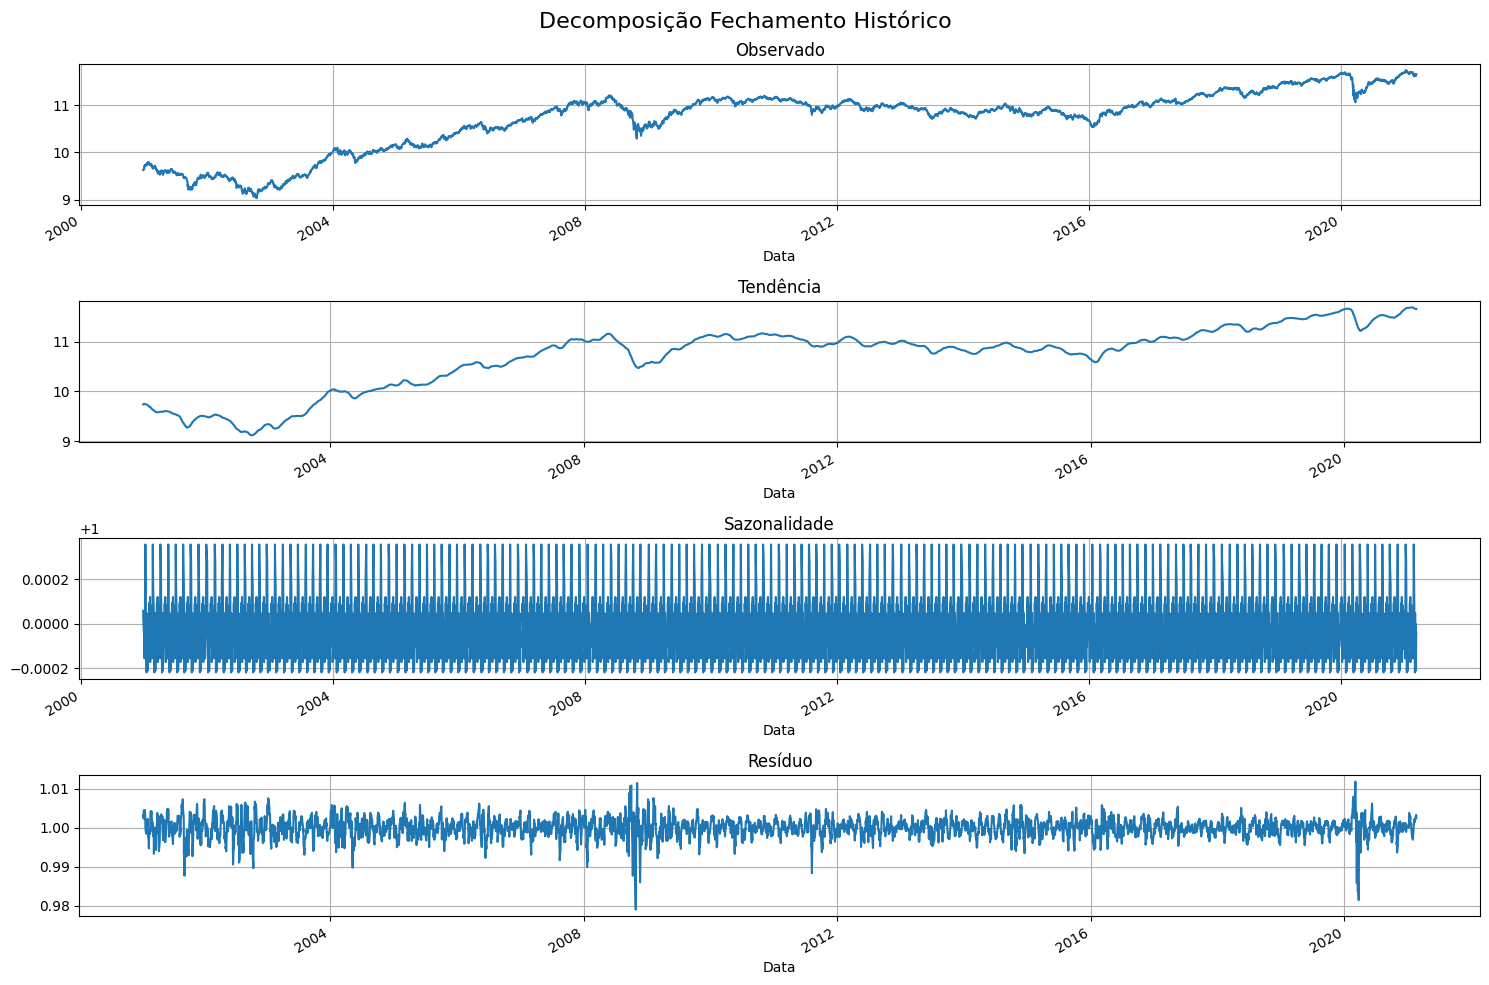

In [27]:
# Plotando a serie decomposta
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15,10))

resultados.observed.plot(ax=ax1)
resultados.trend.plot(ax=ax2)
resultados.seasonal.plot(ax=ax3)
resultados.resid.plot(ax=ax4)
fig.suptitle('Decomposição Fechamento Histórico', fontsize=16)
ax1.set_title('Observado')
ax2.set_title('Tendência')
ax3.set_title('Sazonalidade')
ax4.set_title('Resíduo')
ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()
fig.tight_layout()
#plt.savefig('Assets/Graficos/seasonal.jpg')
plt.show()

In [28]:
# Instalando o statsmodels
#%pip install statsmodels

In [29]:
# Importando o teste de Dickey-Fuller
from statsmodels.tsa.stattools import adfuller

In [30]:
# Performando teste aumentado de Dickey-Fuller para verificar se a nossa série temporal (df_ibovespa_indexData_log) é estacionária
print('Resultados do teste Dickey Fuller:')
dftest = adfuller(df_ibovespa_indexData_log, autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Estatística de Teste', 'p-valor', 'Lags utilizados', 'Número de observações utilizadas'])
for key, value in dftest[4].items():
    dfoutput['Valor crítico (%s)'%key] = value

print(dfoutput)

Resultados do teste Dickey Fuller:
Estatística de Teste                  -0.935776
p-valor                                0.775963
Lags utilizados                       18.000000
Número de observações utilizadas    4980.000000
Valor crítico (1%)                    -3.431664
Valor crítico (5%)                    -2.862121
Valor crítico (10%)                   -2.567079
dtype: float64


#### Observação: Pelo teste de Dickey-Fuller podemos obsevar um p-valor alto e a estatística de teste mais próxima dos valores críticos, o que significa que podemos dizer que nossa série temporal não é estacionária.

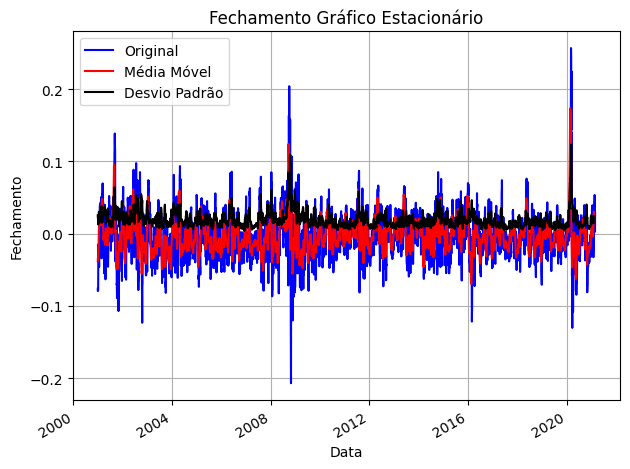

In [31]:
# Transformando série temporal não estacionária em estacionária
df_estacionaria = (df_ibovespa_indexData_log - rolmean_log).dropna()

mm_estacionaria = df_estacionaria.rolling(12).mean()

std_estacionaria = df_estacionaria.rolling(12).std()

fig, ax = plt.subplots()
df_estacionaria.plot(ax=ax, color='blue', label='Original')
mm_estacionaria.plot(ax=ax, color='red', label='Média Móvel')
std_estacionaria.plot(ax=ax, color='black', label='Desvio Padrão')
plt.legend(loc='best')
plt.xlabel('Data')
plt.ylabel('Fechamento')
plt.title('Fechamento Gráfico Estacionário')
plt.grid()
#plt.savefig('Assets/Graficos/estacionario.jpg')
plt.tight_layout()

In [32]:
# Performando teste aumentado de Dickey-Fuller para verificar se a nossa série temporal (df_estacionaria) é estacionária
print('Resultados do teste Dickey Fuller:')
dftest = adfuller(df_estacionaria, autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Estatística de Teste', 'p-valor', 'Lags utilizados', 'Número de observações utilizadas'])
for key, value in dftest[4].items():
    dfoutput['Valor crítico (%s)'%key] = value

print(dfoutput)

Resultados do teste Dickey Fuller:
Estatística de Teste               -1.345711e+01
p-valor                             3.589311e-25
Lags utilizados                     1.800000e+01
Número de observações utilizadas    4.969000e+03
Valor crítico (1%)                 -3.431667e+00
Valor crítico (5%)                 -2.862122e+00
Valor crítico (10%)                -2.567080e+00
dtype: float64


In [33]:
# Importando teste acf e pacf do statsmodels
from statsmodels.tsa.stattools import acf, pacf

In [34]:
# Realizando o plot de autocorrelação do nosso dataset
lag_acf = acf(df_estacionaria, nlags=25)
lag_pacf = pacf(df_estacionaria, nlags=25)

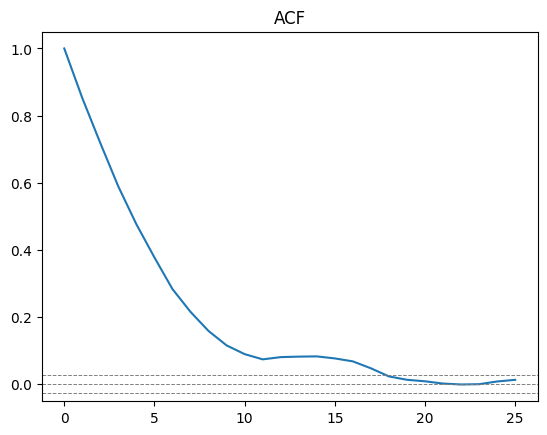

In [35]:
# Gráfico ACF (Valor Q)
plt.plot(lag_acf)

plt.axhline(y = -1.96/(np.sqrt((len(df_estacionaria)-1))), linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y = 0, linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y = 1.96/(np.sqrt((len(df_estacionaria)-1))), linestyle='--', color='gray', linewidth=0.7)

plt.title("ACF")
#plt.savefig('Assets/Graficos/acf.jpg')
plt.show()

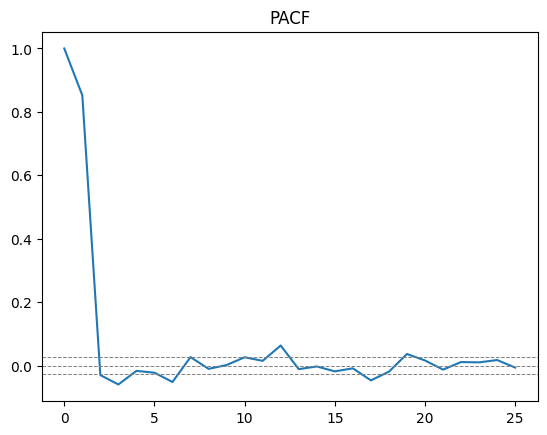

In [36]:
# Gráfico PACF (Valor P)
plt.plot(lag_pacf)

plt.axhline(y = -1.96/(np.sqrt((len(df_estacionaria)-1))), linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y = 0, linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y = 1.96/(np.sqrt((len(df_estacionaria)-1))), linestyle='--', color='gray', linewidth=0.7)

plt.title("PACF")
#plt.savefig('Assets/Graficos/pacf.jpg')
plt.show()

#### Pelos gráficos ACF e PACF temos que Q=4 e P=2

In [37]:
# Importando modelo arima
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

Plot do Modelo ARIMA


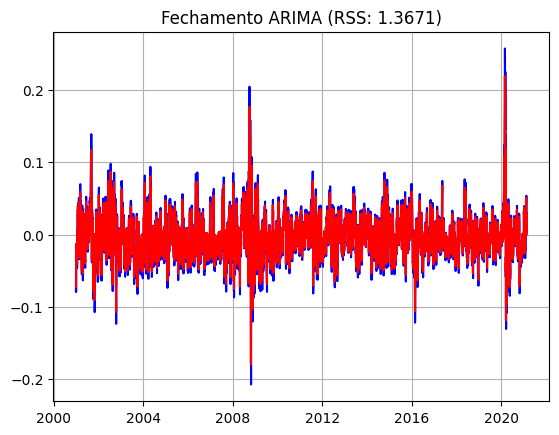

                               SARIMAX Results                                
Dep. Variable:                 Último   No. Observations:                 4988
Model:                 ARIMA(2, 1, 4)   Log Likelihood               13376.815
Date:                Fri, 11 Aug 2023   AIC                         -26739.630
Time:                        12:17:29   BIC                         -26694.028
Sample:                             0   HQIC                        -26723.645
                               - 4988                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1574      0.021     -7.635      0.000      -0.198      -0.117
ar.L2          0.8140      0.015     54.235      0.000       0.785       0.843
ma.L1          0.0343      0.023      1.469      0.1

In [38]:
# Modelo Arima

modelo = ARIMA(df_estacionaria, order=(2,1,4))
resultados_ARIMA = modelo.fit()
plt.plot(df_estacionaria, color='blue')
plt.plot(resultados_ARIMA.fittedvalues, color='red')
plt.title('Fechamento ARIMA (RSS: %.4f'%sum((resultados_ARIMA.fittedvalues - df_estacionaria)**2)+')')
print('Plot do Modelo ARIMA')
plt.grid()
#plt.savefig('Assets/Graficos/arima.jpg')
plt.show()
print(resultados_ARIMA.summary())

In [39]:
# Instalação Auto Arima
#%pip install pmdarima

In [40]:
# Importando o Auto ARIMA
from pmdarima import auto_arima

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-23362.757, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-23360.757, Time=0.25 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-23360.757, Time=0.52 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-23362.517, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-23358.756, Time=0.80 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 1.825 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 4456
Model:               SARIMAX(0, 1, 0)   Log Likelihood               11683.378
Date:                Fri, 11 Aug 2023   AIC                         -23362.757
Time:                        12:17:31   BIC                         -23349.953
Sample:                             0   HQIC                        -23358.243
                               - 4456                             

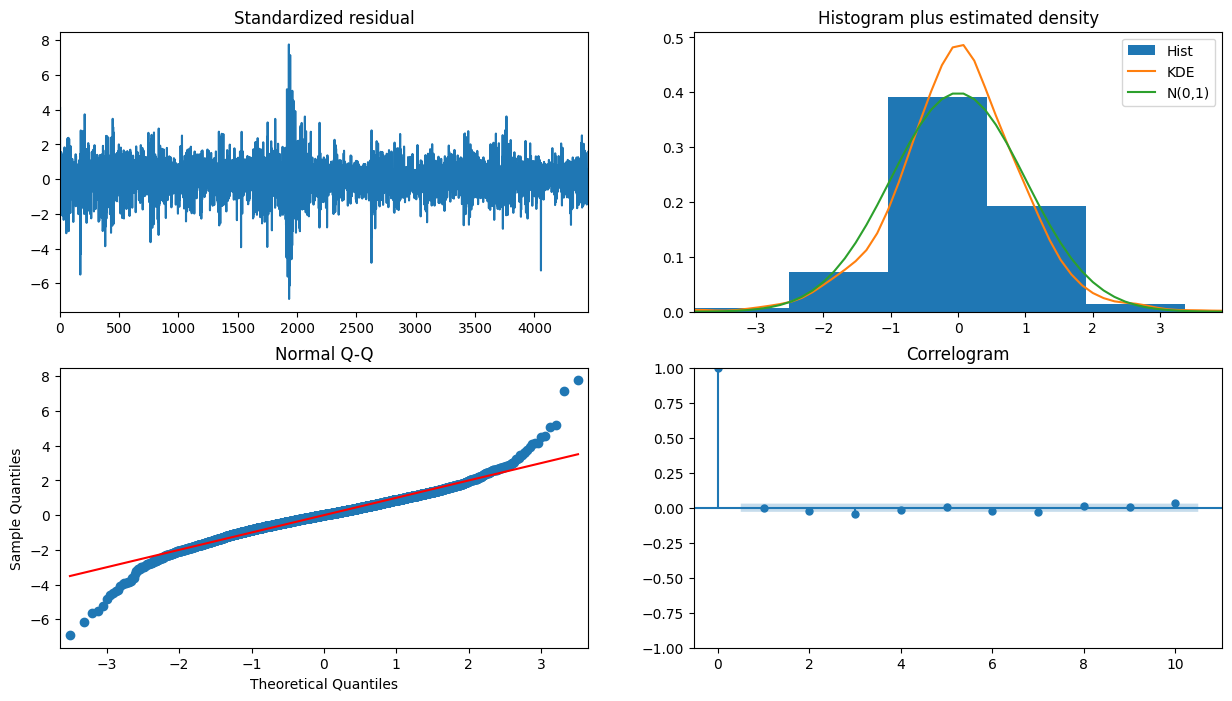

In [41]:
arima_fit = auto_arima(train_data.sort_index(), start_p=0, start_q=0,
                      test='adf',       # usa o teste adf para achar o 'd' otimizado
                      max_p=5, max_q=5, # máximo p e q
                      m=1,              # frequência da série
                      d=None,           # deixa o modelo decidir o 'd'
                      seasonal=False,   # Sem sazonalidade
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(arima_fit.summary())
arima_fit.plot_diagnostics(figsize=(15,8))
#plt.savefig('Assets/Graficos/auto_arima.jpg')
plt.show()

In [43]:
# Fazendo a previsão com os dados ajustados
prediction, confint = arima_fit.predict(len(test_data), return_conf_int=True,alpha=0.05)

4456    11.384201
4457    11.384595
4458    11.384989
4459    11.385383
4460    11.385778
          ...    
4994    11.596213
4995    11.596607
4996    11.597001
4997    11.597395
4998    11.597789
Length: 543, dtype: float64

In [ ]:
# Previsão
prediction

In [44]:
# Intervalo de confiança
confint

array([[11.34976158, 11.41864092],
       [11.33589028, 11.43330037],
       [11.32533814, 11.44464065],
       ...,
       [10.79595442, 12.39804699],
       [10.79560849, 12.39918106],
       [10.79526325, 12.40031445]])

In [45]:
from pmdarima.metrics import smape

smape(test_data.values,prediction)

1.0424726262384774

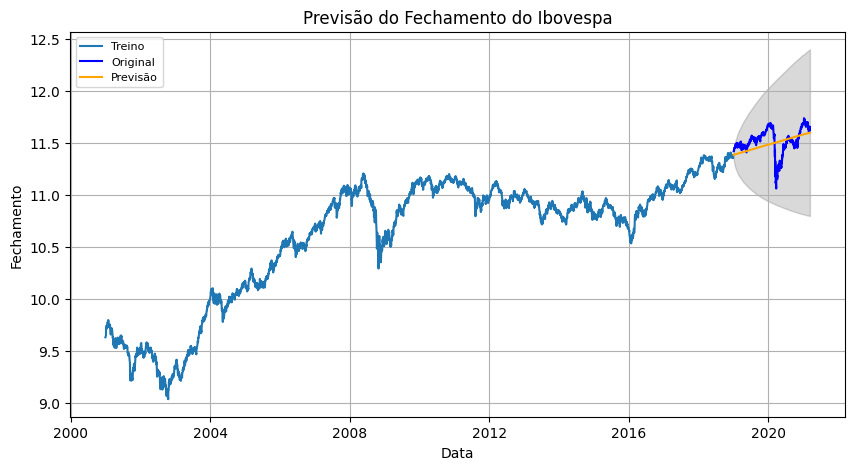

In [47]:
# Previsão
# Transformando em Series Pandas
fc_series = pd.Series(prediction.values, index=test_data.sort_index().index)
lower_series = pd.Series(confint[:, 0], index=test_data.sort_index().index)
upper_series = pd.Series(confint[:, 1], index=test_data.sort_index().index)

# Plotando
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='Treino')
plt.plot(test_data, color = 'blue', label='Original')
plt.plot(fc_series, color = 'orange',label='Previsão')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Previsão do Fechamento do Ibovespa')
plt.xlabel('Data')
plt.ylabel('Fechamento')
plt.legend(loc='upper left', fontsize=8)
plt.grid()
#plt.savefig('Assets/Graficos/previsao.jpg')
plt.show()

In [48]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [49]:
# Relatório de performance
mse = mean_squared_error(test_data.values, prediction.values)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data.values, prediction.values)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data.values, prediction.values))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(prediction.values - test_data.values)/np.abs(test_data.values))
print('MAPE: '+str(mape))

MSE: 0.02181087715550632
MAE: 0.1198479963216483
RMSE: 0.1476850607052261
MAPE: 0.010402870717903233


##### Com um MAPE de aproximadamente 1,0% o modelo tem 99% de acurácia para prever as próximas observações

# Sites consultados

In [50]:
# https://www.analyticsvidhya.com/blog/2021/07/stock-market-forecasting-using-time-series-analysis-with-arima-model/
# https://www.alldatascience.com/time-series/forecasting-time-series-with-auto-arima/

# https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.AutoARIMA.html